In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
revenue_df = pd.read_csv("Resources/Companies_ranked_by_Revenue.csv")
earnings_df = pd.read_csv("Resources/Companies_ranked_by_Earnings.csv")
marketcap_df = pd.read_csv("Resources/Companies_ranked_by_Market_Cap.csv")

In [3]:
revenue_df.head()

,Rank,Name,Symbol,revenue_ttm,price (GBP),country
0,1,Walmart,WMT,665035000000,61.029186,United States
1,2,Amazon,AMZN,604334000000,143.454209,United States
2,3,Saudi Aramco,2222.SR,495354806850,5.505405,Saudi Arabia
3,4,Sinopec,600028.SS,435696880608,0.748295,China
4,5,PetroChina,601857.SS,429671599508,0.969769,China


In [4]:
earnings_df.head()

,Rank,Name,Symbol,earnings_ttm,price (GBP),country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States


In [5]:
marketcap_df.head()

,Rank,Name,Symbol,marketcap,price (GBP),country
0,1,Apple,AAPL,2.689903e+12,176.919492,United States
1,2,Microsoft,MSFT,2.427170e+12,326.537958,United States
2,3,NVIDIA,NVDA,2.259353e+12,92.105725,United States
3,4,Alphabet (Google),GOOG,1.549815e+12,126.458691,United States
4,5,Amazon,AMZN,1.506038e+12,143.492307,United States


In [6]:
revenue_df = revenue_df.rename(columns={
    "revenue_ttm": "Revenue",
    "price (GBP)": "Price_GBP"
})

In [7]:
earnings_df = earnings_df.rename(columns={
    "earnings_ttm": "Earnings",
    "price (GBP)": "Price_GBP"
})

In [8]:
marketcap_df = marketcap_df.rename(columns={
    "marketcap": "Market_Cap",
    "price (GBP)": "Price_GBP"
})

def clean_data(df):
    country_replacements = {
        "USA": "United States",
        "UK": "United Kingdom",
        "UAE": "United Arab Emirates",
        "Korea, South": "South Korea",
        "Russian Federation": "Russia",
        "Iran (Islamic Republic of)": "Iran"
    }

    num_cols = [
        "Gold", "Silver", "Bronze", "Total",
        "Avg_Revenue", "Avg_Earnings", "Avg_MarketCap", "Financial_Power_Score", "Companies"
    ]

    df["Country"] = df["Country"].replace(country_replacements).str.strip().str.title()
    df.fillna(0, inplace=True)

    for col in num_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

    # Group by Country and aggregate
    df = df.groupby("Country", as_index=False).agg({
        col: "sum" if col in ["Gold", "Silver", "Bronze", "Total", "Companies"] else "mean"
        for col in num_cols
    })

    return df


In [9]:
merged_df = earnings_df.merge(marketcap_df, on='Name', suffixes=('_earnings', '_marketcap'))
merged_df = merged_df.merge(revenue_df, on='Name')

In [10]:
merged_df.head()

,Rank_earnings,Name,Symbol_earnings,Earnings,Price_GBP_earnings,country_earnings,Rank_marketcap,Symbol_marketcap,Market_Cap,Price_GBP_marketcap,country_marketcap,Rank,Symbol,Revenue,Price_GBP,country
0,1,Saudi Aramco,2222.SR,2.283780e+11,5.505405,Saudi Arabia,6,2222.SR,1.348543e+12,5.505405,Saudi Arabia,3,2222.SR,495354806850,5.505405,Saudi Arabia
1,2,Apple,AAPL,1.216250e+11,176.734336,United States,1,AAPL,2.689903e+12,176.919492,United States,7,AAPL,385603000000,176.706906,United States
2,3,Microsoft,MSFT,1.077870e+11,326.461762,United States,2,MSFT,2.427170e+12,326.537958,United States,21,MSFT,245122000000,326.316990,United States
3,4,Alphabet (Google),GOOG,1.018210e+11,126.279631,United States,4,GOOG,1.549815e+12,126.458691,United States,12,GOOG,328284000000,126.252962,United States
4,5,Berkshire Hathaway,BRK-B,8.890400e+10,347.625201,United States,8,BRK-B,7.492296e+11,347.667109,United States,6,BRK-B,402877000000,347.537576,United States


In [11]:
merged_df = merged_df.rename(columns={
    "Symbol_earnings": "Symbol",
    "country_earnings": "Country"
})

merged_df = merged_df[['Name', 'Symbol', 'Country','Earnings', 'Market_Cap', 'Revenue']]
merged_df.head()

,Name,Symbol,Symbol,Country,Earnings,Market_Cap,Revenue
0,Saudi Aramco,2222.SR,2222.SR,Saudi Arabia,2.283780e+11,1.348543e+12,495354806850
1,Apple,AAPL,AAPL,United States,1.216250e+11,2.689903e+12,385603000000
2,Microsoft,MSFT,MSFT,United States,1.077870e+11,2.427170e+12,245122000000
3,Alphabet (Google),GOOG,GOOG,United States,1.018210e+11,1.549815e+12,328284000000
4,Berkshire Hathaway,BRK-B,BRK-B,United States,8.890400e+10,7.492296e+11,402877000000


In [12]:
# CLEAN COUNTRY NAMES BEFORE ANY GROUPING
merged_df["Country"] = merged_df["Country"].replace({
    "USA": "United States",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "Korea, South": "South Korea",
    "Russian Federation": "Russia",
    "Iran (Islamic Republic of)": "Iran"
}).str.strip().str.title()

# Group by Country and sum financial metrics
country_df = merged_df.groupby('Country')[['Revenue', 'Earnings', 'Market_Cap']].sum().reset_index()

# Rank by each metric
country_df['Revenue_Rank'] = country_df['Revenue'].rank(ascending=False).astype(int)
country_df['Earnings_Rank'] = country_df['Earnings'].rank(ascending=False).astype(int)
country_df['MarketCap_Rank'] = country_df['Market_Cap'].rank(ascending=False).astype(int)

# 🎖️ Updated medal assignment logic
def assign_medals(rank):
    if rank <= 5:
        return 'Gold'
    elif rank <= 10:
        return 'Silver'
    elif rank <= 20:
        return 'Bronze'
    else:
        return None

# Assign medals per metric
for metric in ['Revenue', 'Earnings', 'MarketCap']:
    country_df[f'{metric}_Medal'] = country_df[f'{metric}_Rank'].apply(assign_medals)

# Initialize medal tally per country
medal_tally = []

for _, row in country_df.iterrows():
    country = row['Country']
    medals = {'Country': country, 'Gold': 0, 'Silver': 0, 'Bronze': 0}
    
    for metric in ['Revenue', 'Earnings', 'MarketCap']:
        medal = row[f'{metric}_Medal']
        if medal:
            medals[medal] += 1
    
    medal_tally.append(medals)

# Create and sort final medal tally DataFrame
medal_df = pd.DataFrame(medal_tally)
medal_df['Total'] = medal_df[['Gold', 'Silver', 'Bronze']].sum(axis=1)
medal_df = medal_df.sort_values(by='Total', ascending=False)

# Save updated medal data to CSV
medal_df.to_csv("country_metrics_medals.csv", index=False)

# Preview
medal_df.head()


,Country,Gold,Silver,Bronze,Total
22,France,0,3,0,3
69,Switzerland,0,3,0,3
27,Hong Kong,0,0,3,3
23,Germany,1,2,0,3
36,Japan,3,0,0,3


In [13]:
merged_df['Earnings_Rank'] = merged_df['Earnings'].rank(ascending=False).astype(int)
merged_df['MarketCap_Rank'] = merged_df['Market_Cap'].rank(ascending=False).astype(int)
merged_df['Revenue_Rank'] = merged_df['Revenue'].rank(ascending=False).astype(int)
merged_df.head()

,Name,Symbol,Symbol,Country,Earnings,Market_Cap,Revenue,Earnings_Rank,MarketCap_Rank,Revenue_Rank
0,Saudi Aramco,2222.SR,2222.SR,Saudi Arabia,2.283780e+11,1.348543e+12,495354806850,1,6,3
1,Apple,AAPL,AAPL,United States,1.216250e+11,2.689903e+12,385603000000,2,1,7
2,Microsoft,MSFT,MSFT,United States,1.077870e+11,2.427170e+12,245122000000,3,2,21
3,Alphabet (Google),GOOG,GOOG,United States,1.018210e+11,1.549815e+12,328284000000,4,4,12
4,Berkshire Hathaway,BRK-B,BRK-B,United States,8.890400e+10,7.492296e+11,402877000000,5,8,6


In [14]:
merged_df.to_csv("Merged_Company_Financial.csv", index=False)

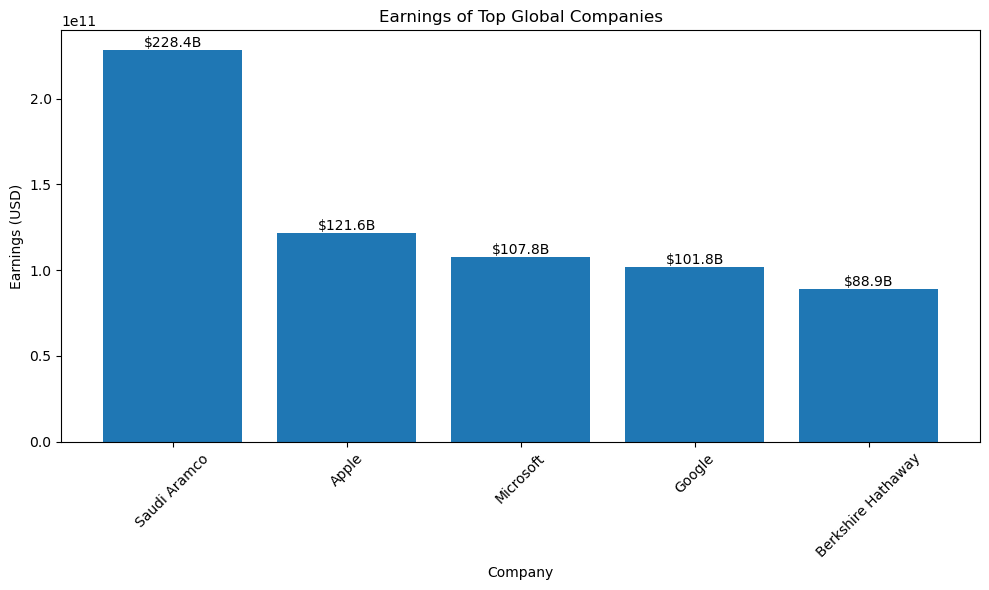

In [15]:
# Company names and earnings in USD
companies = ['Saudi Aramco', 'Apple', 'Microsoft', 'Google', 'Berkshire Hathaway']
earnings = [2.283780e+11, 1.216250e+11, 1.077870e+11, 1.018210e+11, 8.890400e+10]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(companies, earnings)

# Add titles and labels
plt.title('Earnings of Top Global Companies')
plt.xlabel('Company')
plt.ylabel('Earnings (USD)')

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"${yval/1e9:.1f}B", ha='center', va='bottom')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Load cleaned company financials
merged_df = pd.read_csv("Merged_Company_Financial.csv")

# Drop duplicate columns if they exist
if 'Symbol.1' in merged_df.columns:
    merged_df = merged_df.drop(columns=['Symbol.1'])

# Clean country names again (just to be safe)
merged_df["Country"] = merged_df["Country"].replace({
    "USA": "United States",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "Korea, South": "South Korea",
    "Russian Federation": "Russia",
    "Iran (Islamic Republic of)": "Iran"
}).str.strip().str.title()

# Step 1: Company counts and financial averages
company_counts = merged_df.groupby("Country").size().reset_index(name="Companies")
avg_metrics = merged_df.groupby("Country")[["Revenue", "Earnings", "Market_Cap"]].mean().reset_index()
avg_metrics.columns = ["Country", "Avg_Revenue", "Avg_Earnings", "Avg_MarketCap"]

# Step 2: Merge with previously assigned medal_df
full_country_stats = pd.merge(medal_df, company_counts, on="Country", how="left")
full_country_stats = pd.merge(full_country_stats, avg_metrics, on="Country", how="left")

# Step 3: Compute Financial Power Score
full_country_stats["Financial_Power_Score"] = (
    full_country_stats["Total"] * 3 +
    full_country_stats["Avg_Earnings"] / 1e10 +
    full_country_stats["Avg_Revenue"] / 1e10 +
    full_country_stats["Avg_MarketCap"] / 1e11
)

# Step 4: Round values
for col in ["Avg_Revenue", "Avg_Earnings", "Avg_MarketCap", "Financial_Power_Score"]:
    full_country_stats[col] = full_country_stats[col].round(0 if col != "Financial_Power_Score" else 2)

# Step 5: Save unified and enriched file
full_country_stats.to_csv("country_metrics_medals.csv", index=False)

# Step 6: Visualization - Total Medal Bar Chart
fig = px.bar(
    full_country_stats.sort_values("Total", ascending=False),
    x="Country",
    y="Total",
    color="Total",
    title="🏆 Total Medals by Country (Financial Olympics)",
    labels={"Total": "Total Medals"},
    text="Total"
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [17]:
fig = px.choropleth(
    full_country_stats,
    locations="Country",
    locationmode="country names",
    color="Financial_Power_Score",
    title="🌍 Global Financial Power Score by Country",
    color_continuous_scale="Viridis"
)
fig.show()


In [18]:
summary_df = pd.read_csv("country_metrics_medals.csv")

scatter_fig = px.scatter(
    summary_df,
    x="Avg_Revenue",
    y="Avg_Earnings",
    size="Companies",
    color="Country",
    hover_name="Country",
    title="📈 Avg Revenue vs Avg Earnings per Country (Bubble = Company Count)",
    labels={
        "Avg_Revenue": "Average Revenue (USD)",
        "Avg_Earnings": "Average Earnings (USD)"
    },
    hover_data={
        "Avg_Revenue": ":,.0f",
        "Avg_Earnings": ":,.0f",
        "Avg_MarketCap": ":,.0f",
        "Companies": True,
        "Gold": True,
        "Silver": True,
        "Bronze": True,
        "Total": True
    }
)

scatter_fig.show()


In [19]:


# Use the full dataset
summary_df = pd.read_csv("country_metrics_medals.csv")


# Now you can safely run the enhanced choropleth code
map_fig = px.choropleth(
    summary_df,
    locations="Country",
    locationmode="country names",
    color="Financial_Power_Score",
    hover_name="Country",
    title="🌍 Financial Power Score by Country",
    color_continuous_scale="Viridis",
    hover_data={
        "Financial_Power_Score": True,
        "Companies": True,
        "Avg_Revenue": ":,.0f",
        "Avg_Earnings": ":,.0f",
        "Avg_MarketCap": ":,.0f",
        "Gold": True,
        "Silver": True,
        "Bronze": True,
        "Total": True
    }
)

map_fig.show()


In [20]:
# Load and clean your summary data
summary_df = pd.read_csv("country_metrics_medals.csv")

# Make sure required columns exist and are numeric
for col in ['Gold', 'Silver', 'Bronze']:
    summary_df[col] = pd.to_numeric(summary_df[col], errors="coerce").fillna(0)

# Create the stacked bar chart
fig = go.Figure(data=[
    go.Bar(name='Gold', x=summary_df['Country'], y=summary_df['Gold']),
    go.Bar(name='Silver', x=summary_df['Country'], y=summary_df['Silver']),
    go.Bar(name='Bronze', x=summary_df['Country'], y=summary_df['Bronze'])
])

fig.update_layout(
    barmode='stack',
    title="🎖️ Gold, Silver, Bronze Breakdown by Country",
    xaxis_title="Country",
    yaxis_title="Medal Count",
    xaxis_tickangle=-45
)

fig.show()


In [21]:


# Basic choropleth map by country
fig = px.choropleth(
    medal_df,
    locations="Country",
    locationmode="country names",  # Match full country names
    color="Total",
    hover_name="Country",
    color_continuous_scale="YlOrRd",
    title="🌍 Global Financial Olympics: Total Medals by Country"
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()